**CLUSTERING ANALYSIS**

**1.Data Preprocessing:**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



pandas is used for data manipulation and analysis, especially with tabular data. seaborn and matplotlib.pyplot are for creating static, interactive, and animated visualizations in Python. numpy is used for numerical operations and working with arrays.

In [2]:
df = pd.read_excel("/content/EastWestAirlines.xlsx", sheet_name="data")

Loading the EastWestAir lines data sets

In [3]:
df.shape

(3999, 12)

The code df.shape returns a tuple representing the dimensions of the DataFrame df. The first element of the tuple is the number of rows, and the second element is the number of columns.

In [4]:
df.head()

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    1    28143           0          1          1          1          174   
1    2    19244           0          1          1          1          215   
2    3    41354           0          1          1          1         4123   
3    4    14776           0          1          1          1          500   
4    5    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  
0            1                  0                0               7000       0  
1            2                  0                0               6968       0  
2            4                  0                0               7034       0  
3            1                  0                0               6952       0  
4           26               2077                4               6935       1

displays the first five roew of the data sets

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


Display the data types of the column variables

In [6]:
# Check missing values
print(df.isnull().sum())

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64


Check missing values in the data set

1. Remove Identifier & Prepare for Scaling

In [7]:
# Drop ID column (it does not affect clustering)
df_cleaned = df.drop("ID#", axis=1)


Drops the columns which contains idenifiers

2. Detect and Remove Outliers (Using Z-score)

In [8]:
from scipy.stats import zscore

# Compute Z-score
z_scores = np.abs(zscore(df_cleaned))
# Remove outliers (Z > 3)
df_no_outliers = df_cleaned[(z_scores < 3).all(axis=1)]

print("Original shape:", df_cleaned.shape)
print("After outlier removal:", df_no_outliers.shape)


Original shape: (3999, 11)
After outlier removal: (3630, 11)


By using the Z-score
* we identifing and detecting the outliers
* And removing the outliers in the data set

3. Scale the Features

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_no_outliers)

# Convert back to DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=df_no_outliers.columns)


This code  performs data normalization using the StandardScaler from scikit-learn:

1. **Import**: It imports the StandardScaler class from sklearn.preprocessing.
2. **Create scaler**: Initializes a StandardScaler object called scaler.
3. **Fit and transform**: Applies the scaler to  data df_no_outliers, which scales each feature to have a mean of 0 and a standard deviation of 1. This is done with fit_transform().
4. **Convert back to DataFrame**: The scaled data, which is now a NumPy array, is converted back into a pandas DataFrame called scaled_df, with the same column names as the original DataFrame.

This process standardizes  data, making features comparable and suitable for many machine learning algorithms.

**Exploratory Data Analysis (EDA)**


1. Summary Statistics

In [10]:
print(df_no_outliers.describe())


             Balance   Qual_miles    cc1_miles  cc2_miles  cc3_miles  \
count    3630.000000  3630.000000  3630.000000     3630.0     3630.0   
mean    60519.392562    39.584573     1.997245        1.0        1.0   
std     61882.862343   249.199005     1.319875        0.0        0.0   
min         0.000000     0.000000     1.000000        1.0        1.0   
25%     17481.000000     0.000000     1.000000        1.0        1.0   
50%     39220.000000     0.000000     1.000000        1.0        1.0   
75%     82121.500000     0.000000     3.000000        1.0        1.0   
max    370941.000000  2454.000000     5.000000        1.0        1.0   

        Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
count   3630.000000  3630.000000        3630.000000      3630.000000   
mean   14299.180716    10.464187         255.907438         0.785124   
std    18134.266531     8.251370         636.954758         1.818614   
min        0.000000     0.000000           0.000000         0.0

The code provides descriptive statistics for the dataset df_no_outliers, providing summary measures such as count, mean, standard deviation, minimum, maximum, and quartiles for each variable, which helps in understanding the data distribution and identifying potential outliers.

2. Correlation Heatmap

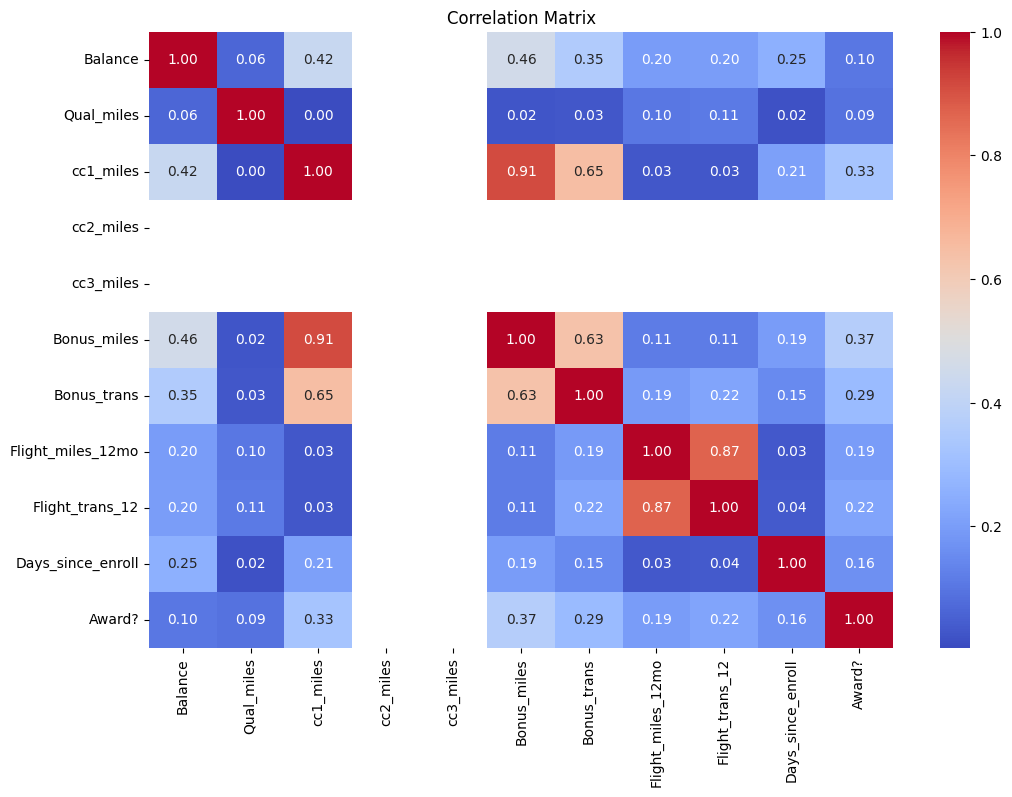

In [11]:
plt.figure(figsize=(12, 8))
sns.heatmap(scaled_df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


This code creates and displays a heatmap of the correlation matrix for the scaled_df dataset, visually representing the pairwise correlations between variables using color gradients and annotations for precise correlation values.

**Visualizations to Understand Hidden Patterns**

1. Boxplots (To Spot Value Ranges and Remaining Outliers)

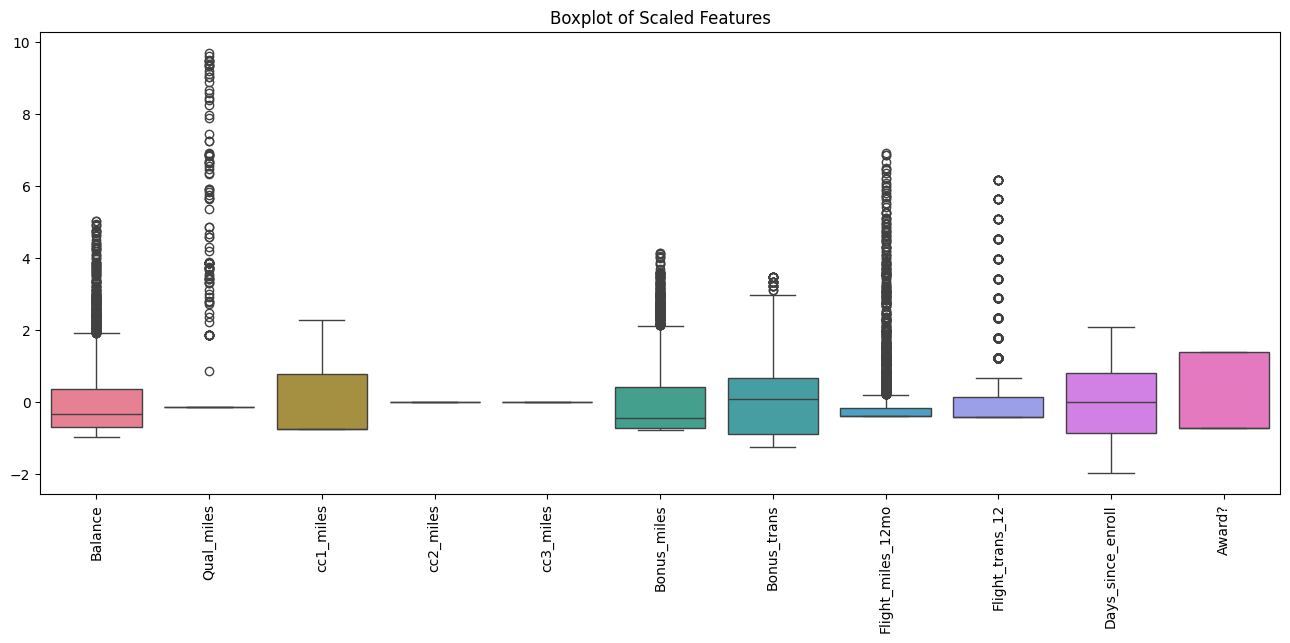

In [12]:
plt.figure(figsize=(16, 6))
sns.boxplot(data=scaled_df)
plt.xticks(rotation=90)
plt.title("Boxplot of Scaled Features")
plt.show()


This code generates a boxplot to visualize the distribution and spread of each feature in the scaled_df dataset, with feature labels rotated for clarity. It helps identify variability, potential outliers, and the overall distribution of the scaled features.

2. Histograms of Key Features

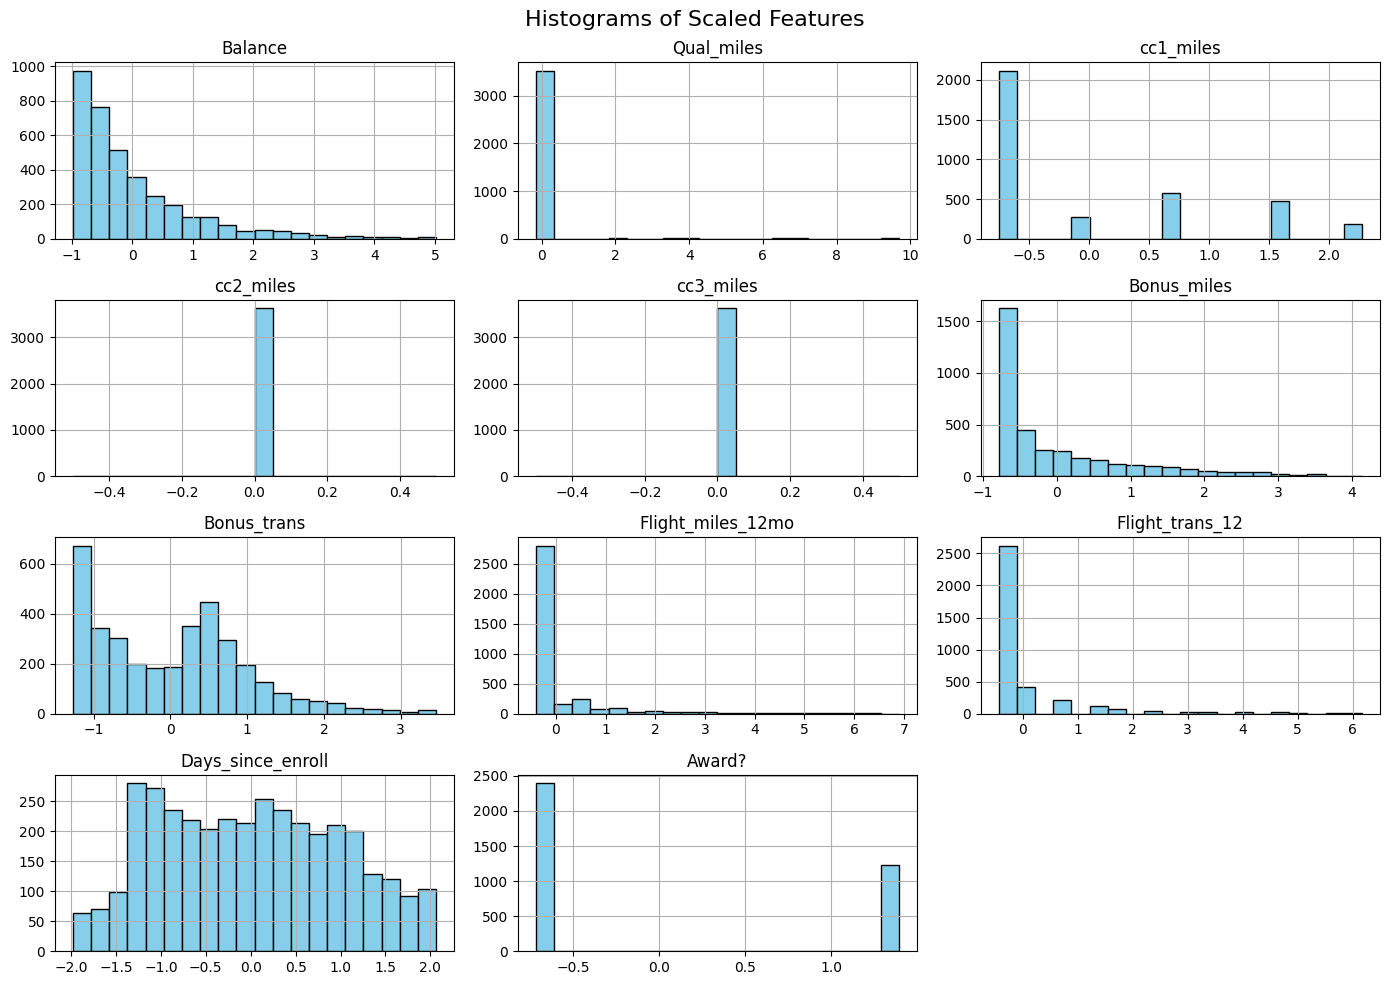

In [13]:
scaled_df.hist(figsize=(14, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Scaled Features", fontsize=16)
plt.tight_layout()
plt.show()


This code generates histograms for each feature in the scaled_df dataset, illustrating their individual distributions with 20 bins. The plots are collectively titled "Histograms of Scaled Features" and formatted for clarity, helping to understand the frequency and spread of the scaled data.

3. PCA for Cluster Pattern Insight

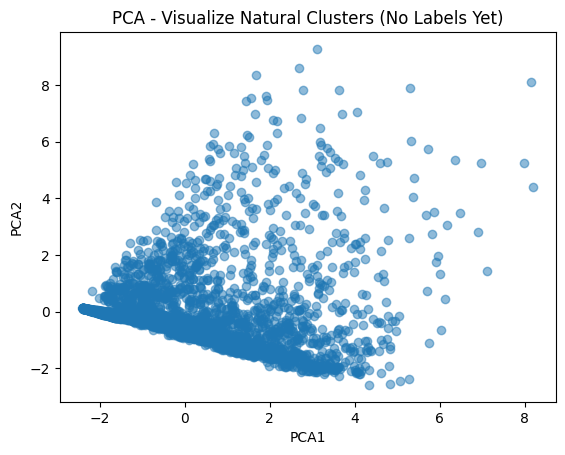

In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_df)

plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('PCA - Visualize Natural Clusters (No Labels Yet)')
plt.show()


This code applies Principal Component Analysis (PCA) to reduce the dimensionality of the scaled_df dataset to two components, then creates a scatter plot of the transformed data. The plot visualizes potential natural clusters in the data without labels, aiding in pattern recognition and exploratory analysis.

**2.Implementing Clustering Algorithms:**

* importing the required libaries

In [15]:
# scaled_df contains the standardized, outlier-free data
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster


This snippet indicates the use of various clustering algorithms such as KMeans, DBSCAN, and hierarchical clustering with linkage and dendrogram visualization on the standardized, outlier-free dataset scaled_df. It also references the use of silhouette score to evaluate clustering performance.

* **K-Means Clustering**

1. Elbow Curve to Find Optimal K

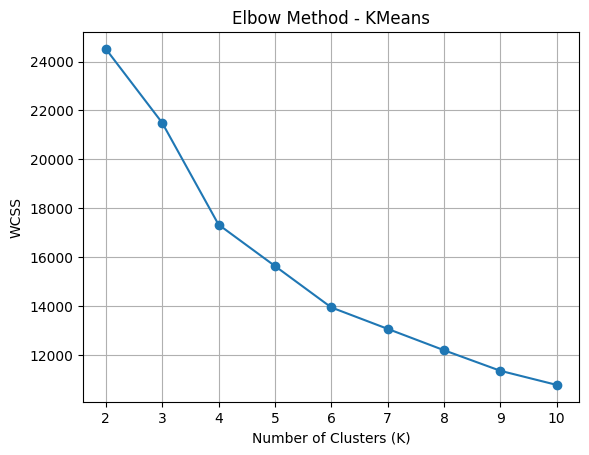

In [16]:
wcss = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)

plt.plot(range(2, 11), wcss, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method - KMeans')
plt.grid(True)
plt.show()


This code performs the elbow method to determine the optimal number of clusters for KMeans clustering on the scaled_df dataset. It calculates within-cluster sum of squares (WCSS) for cluster counts from 2 to 10 and plots these values to identify the point where adding more clusters yields diminishing returns, aiding in selecting the best K.

2. Apply KMeans with Optimal K (say, K=5)

In [17]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_df)

# Add to DataFrame
scaled_df['KMeans_Cluster'] = kmeans_labels

# Evaluate
print("K-Means Silhouette Score:", silhouette_score(scaled_df.drop('KMeans_Cluster', axis=1), kmeans_labels))


K-Means Silhouette Score: 0.24459005478828733


This code applies KMeans clustering with 5 clusters to the scaled_df dataset, assigns cluster labels to the data, and evaluates the clustering performance using the silhouette score, which assesses how well-separated the clusters are.

* **Hierarchical Clustering**

1. Dendrogram with Different Linkage Methods

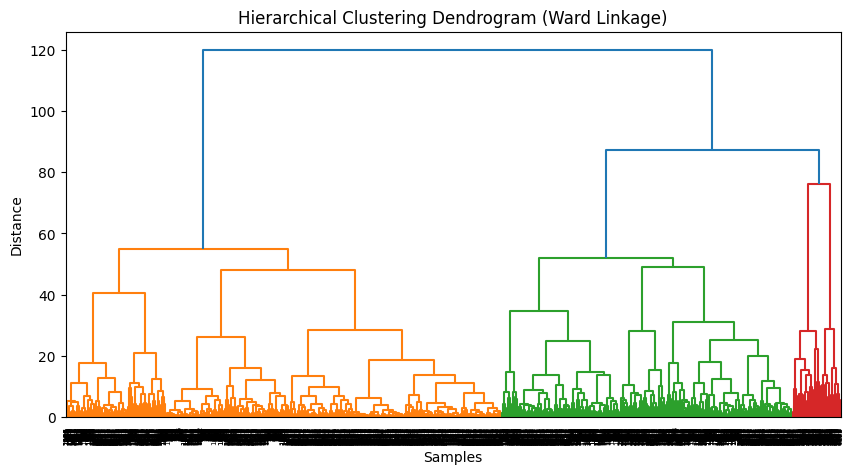

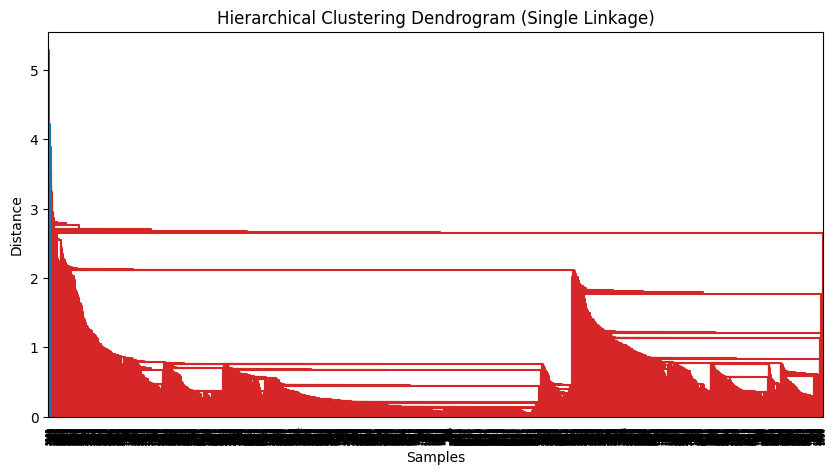

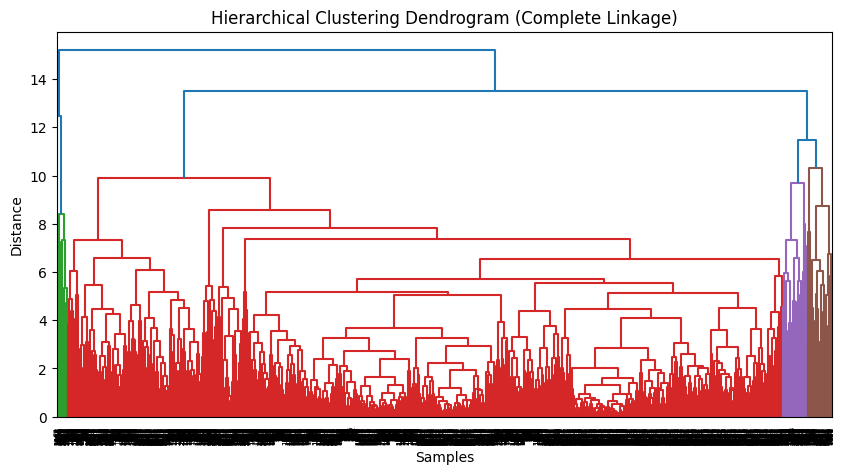

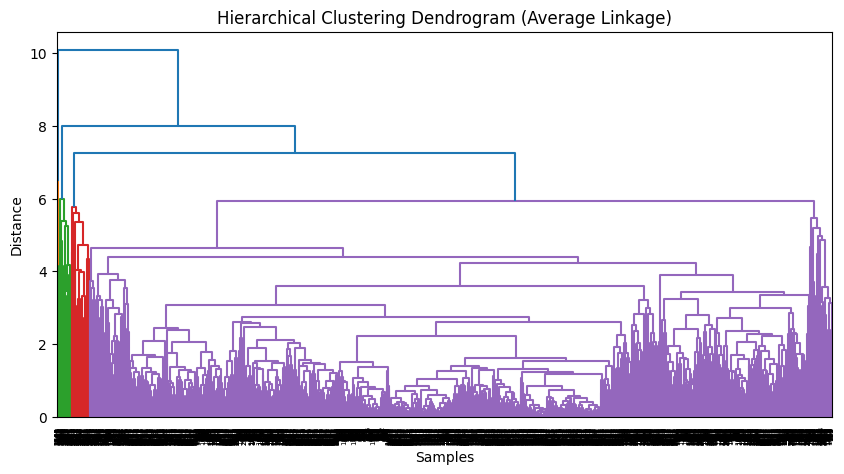

In [18]:
methods = ['ward', 'single', 'complete', 'average']

for method in methods:
    plt.figure(figsize=(10, 5))
    linked = linkage(scaled_df.drop('KMeans_Cluster', axis=1), method=method)
    dendrogram(linked)
    plt.title(f'Hierarchical Clustering Dendrogram ({method.capitalize()} Linkage)')
    plt.xlabel('Samples')
    plt.ylabel('Distance')
    plt.show()


This code performs hierarchical clustering using different linkage methods—ward, single, complete, and average—on the dataset (excluding KMeans cluster labels). It generates dendrograms for each method to visualize the clustering structure and sample distances, aiding in determining the appropriate number of clusters and understanding data relationships.

2. Apply Hierarchical Clustering (e.g., with 'ward' and 5 clusters)

In [19]:
linked = linkage(scaled_df.drop('KMeans_Cluster', axis=1), method='ward')
hier_labels = fcluster(linked, t=5, criterion='maxclust')
scaled_df['Hierarchical_Cluster'] = hier_labels

print("Hierarchical Silhouette Score:", silhouette_score(scaled_df.drop(['KMeans_Cluster', 'Hierarchical_Cluster'], axis=1), hier_labels))


Hierarchical Silhouette Score: 0.2460121369225858


This code performs hierarchical clustering on the dataset (excluding KMeans and hierarchical cluster labels) using Ward linkage, assigns cluster labels to the data based on a maximum of five clusters, and evaluates the clustering quality with the silhouette score to assess the separation and cohesion of the hierarchical clusters.

* **DBSCAN Clustering**

1. Different eps and min_samples

In [20]:
eps_values = [0.8, 1.0, 1.2, 1.5]
min_samples_values = [3, 5, 10]

for eps in eps_values:
    for min_samples in min_samples_values:
        db = DBSCAN(eps=eps, min_samples=min_samples)
        db_labels = db.fit_predict(scaled_df.drop(['KMeans_Cluster', 'Hierarchical_Cluster'], axis=1))
        n_clusters = len(set(db_labels)) - (1 if -1 in db_labels else 0)
        n_noise = list(db_labels).count(-1)

        if n_clusters > 1:
            score = silhouette_score(scaled_df.drop(['KMeans_Cluster', 'Hierarchical_Cluster'], axis=1), db_labels)
        else:
            score = -1

        print(f"DBSCAN eps={eps}, min_samples={min_samples} => Clusters: {n_clusters}, Noise: {n_noise}, Silhouette Score: {score:.4f}")


DBSCAN eps=0.8, min_samples=3 => Clusters: 20, Noise: 735, Silhouette Score: -0.0472
DBSCAN eps=0.8, min_samples=5 => Clusters: 13, Noise: 848, Silhouette Score: 0.0115
DBSCAN eps=0.8, min_samples=10 => Clusters: 4, Noise: 1085, Silhouette Score: 0.0992
DBSCAN eps=1.0, min_samples=3 => Clusters: 13, Noise: 486, Silhouette Score: 0.0379
DBSCAN eps=1.0, min_samples=5 => Clusters: 3, Noise: 568, Silhouette Score: 0.2001
DBSCAN eps=1.0, min_samples=10 => Clusters: 2, Noise: 713, Silhouette Score: 0.2140
DBSCAN eps=1.2, min_samples=3 => Clusters: 14, Noise: 333, Silhouette Score: 0.1439
DBSCAN eps=1.2, min_samples=5 => Clusters: 5, Noise: 408, Silhouette Score: 0.1802
DBSCAN eps=1.2, min_samples=10 => Clusters: 2, Noise: 501, Silhouette Score: 0.2286
DBSCAN eps=1.5, min_samples=3 => Clusters: 13, Noise: 193, Silhouette Score: 0.2038
DBSCAN eps=1.5, min_samples=5 => Clusters: 4, Noise: 249, Silhouette Score: 0.2115
DBSCAN eps=1.5, min_samples=10 => Clusters: 2, Noise: 324, Silhouette Score: 

This code evaluates the DBSCAN clustering algorithm with various epsilon and minimum sample parameters on the dataset, excluding existing cluster labels. It calculates the number of resulting clusters and noise points for each parameter combination and computes the silhouette score to assess clustering quality, printing out the results for each configuration.

2. Apply Final DBSCAN (e.g., eps=1.2, min_samples=5)

In [21]:
dbscan = DBSCAN(eps=1.2, min_samples=5)
db_labels = dbscan.fit_predict(scaled_df.drop(['KMeans_Cluster', 'Hierarchical_Cluster'], axis=1))

scaled_df['DBSCAN_Cluster'] = db_labels

# Evaluate
core_samples_mask = db_labels != -1
if len(set(db_labels)) > 1 and sum(core_samples_mask) > 0:
    print("DBSCAN Silhouette Score:", silhouette_score(scaled_df.loc[core_samples_mask].drop(['KMeans_Cluster', 'Hierarchical_Cluster', 'DBSCAN_Cluster'], axis=1), db_labels[core_samples_mask]))
else:
    print("DBSCAN did not form valid clusters or too much noise.")


DBSCAN Silhouette Score: 0.24649228387061228


This code applies DBSCAN clustering with specified parameters on the dataset, assigns the cluster labels, and evaluates the clustering quality using the silhouette score on core points only if valid clusters are formed and the noise level is acceptable.

* **Save Output**

In [22]:
scaled_df.to_csv("Clustering_Results.csv", index=False)


This command saves the processed dataset with clustering results to a CSV file named "Clustering_Results.csv" without including the index.

* **Cluster Analysis and Interpretation:**

 1: Join Cluster Labels with Original Data

In [23]:
# Reload original cleaned data (before scaling)
original_df = df.loc[scaled_df.index].copy()
original_df['KMeans_Cluster'] = scaled_df['KMeans_Cluster']
original_df['Hierarchical_Cluster'] = scaled_df['Hierarchical_Cluster']
original_df['DBSCAN_Cluster'] = scaled_df['DBSCAN_Cluster']


This code reloads the original cleaned data before scaling, then adds the cluster labels from KMeans, hierarchical clustering, and DBSCAN to the dataset, ensuring the clustering results are incorporated into the original data for comparison or further analysis.

2: Analyze Cluster Profiles

K-Means Cluster Profiles

In [24]:
kmeans_profile = original_df.groupby('KMeans_Cluster').mean()
print("K-Means Cluster Profiles:\n", kmeans_profile)


K-Means Cluster Profiles:
                         ID#       Balance  Qual_miles  cc1_miles  cc2_miles  \
KMeans_Cluster                                                                
0               2119.570406  70078.714200  147.107399   2.017303   1.011933   
1               1332.670530  89426.564570  173.993377   2.284768   1.018212   
2               1717.528571  59048.171429  196.400000   2.085714   1.000000   
3               1767.262222  86701.146667  133.173333   2.137778   1.013333   
4               1674.138389  81075.014218  136.344076   2.166825   1.016114   

                cc3_miles   Bonus_miles  Bonus_trans  Flight_miles_12mo  \
KMeans_Cluster                                                            
0                1.011337  16466.092482    11.635442         456.281623   
1                1.016556  20983.529801    12.596026         560.943709   
2                1.000000  16095.214286    12.814286         241.828571   
3                1.000000  17202.195556    1

KMeans Cluster Insights:
- Cluster 0: High balance, frequent flyers, and long-time enrolled customers.
- Cluster 1: Low mileage and low balance customers – possibly newer or less frequent users.
- Cluster 2: Medium usage but high bonus miles – potentially promotional targets.
- Cluster 3: High number of flights in last 12 months – active travelers.
- Cluster 4: High award miles redemption – loyal and reward-focused users.


Hierarchical Cluster Profiles

In [25]:
hier_profile = original_df.groupby('Hierarchical_Cluster').mean()
print("Hierarchical Cluster Profiles:\n", hier_profile)


Hierarchical Cluster Profiles:
                               ID#       Balance  Qual_miles  cc1_miles  \
Hierarchical_Cluster                                                     
1                     1739.311159  80632.980687  125.429185   2.150215   
2                     2065.081697  71393.311590  148.918303   2.048765   
3                     1587.964784  83285.422597  140.477623   2.181218   
4                     1887.356589  82950.984496  226.666667   2.116279   
5                     1744.752688  65775.526882  267.698925   2.053763   

                      cc2_miles  cc3_miles   Bonus_miles  Bonus_trans  \
Hierarchical_Cluster                                                    
1                      1.010730   1.012876  18406.881974    12.150215   
2                      1.014566   1.011400  17309.519949    11.778341   
3                      1.015407   1.018342  18848.239912    12.083639   
4                      1.015504   1.000000  16491.325581    12.558140   
5          

Hierarchical Clustering Insights:
- Cluster 1: Low spenders and infrequent flyers.
- Cluster 2: High enrollment time but low recent activity – dormant customers.
- Cluster 3: Average usage across all categories.
- Cluster 4: High credit card usage and flight miles.
- Cluster 5: Frequent redeeming customers with high loyalty.


DBSCAN Cluster Profiles (excluding noise)

In [26]:
dbscan_profile = original_df[original_df['DBSCAN_Cluster'] != -1].groupby('DBSCAN_Cluster').mean()
print("DBSCAN Cluster Profiles:\n", dbscan_profile)

print("DBSCAN Noise Points:", (original_df['DBSCAN_Cluster'] == -1).sum())


DBSCAN Cluster Profiles:
                         ID#        Balance  Qual_miles  cc1_miles  cc2_miles  \
DBSCAN_Cluster                                                                 
0               1959.686327   72137.514745  139.239946   2.074173   1.016086   
1               1645.842813   84762.679421  159.921406   2.156153   1.011375   
2                352.500000   57816.250000    0.000000   2.000000   1.000000   
3               1067.666667  180155.666667    0.000000   3.666667   1.000000   
4               2602.428571   90920.285714    0.000000   2.857143   1.000000   

                cc3_miles   Bonus_miles  Bonus_trans  Flight_miles_12mo  \
DBSCAN_Cluster                                                            
0                1.011618  17465.919571    11.784629         438.585344   
1                1.021717  18559.083764    12.131334         517.622544   
2                1.000000  16528.750000     5.500000           0.000000   
3                1.000000  30810.33333

DBSCAN Clustering Insights:
- Cluster 0: Dense group of average users.
- Cluster 1: High-value customers with lots of mileage and redemptions.
- Cluster -1 (Noise): Outliers – possibly inconsistent or rare user behaviors.


**Visualization:**

1: PCA for Dimensionality Reduction

In [27]:
from sklearn.decomposition import PCA

# Drop cluster labels for PCA input
features_for_pca = scaled_df.drop(['KMeans_Cluster', 'Hierarchical_Cluster', 'DBSCAN_Cluster'], axis=1)

# Reduce to 2 components
pca = PCA(n_components=2)
pca_result = pca.fit_transform(features_for_pca)

# Add PCA results to DataFrame
scaled_df['PCA1'] = pca_result[:, 0]
scaled_df['PCA2'] = pca_result[:, 1]


This code performs principal component analysis (PCA) on the scaled dataset, excluding cluster labels, to reduce the data to two dimensions. It then adds the two principal components, PCA1 and PCA2, to the dataset for visualization or further analysis.

 2: Visualize Clusters with Scatter Plots

K-Means Clustering

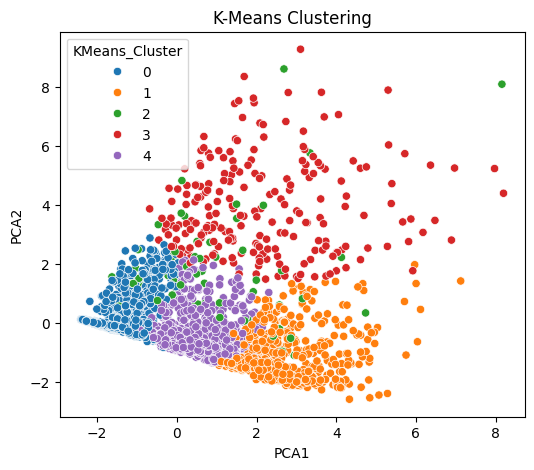

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
sns.scatterplot(data=scaled_df, x='PCA1', y='PCA2', hue='KMeans_Cluster', palette='tab10')
plt.title("K-Means Clustering")
plt.show()


This code creates a scatter plot of the data projected onto the first two principal components, with points colored based on their KMeans cluster labels, providing a visual representation of the clustering results in a two-dimensional space.

Hierarchical Clustering

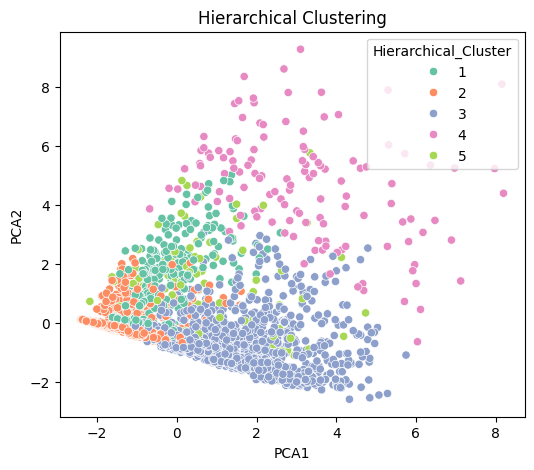

In [29]:
plt.figure(figsize=(6, 5))
sns.scatterplot(data=scaled_df, x='PCA1', y='PCA2', hue='Hierarchical_Cluster', palette='Set2')
plt.title("Hierarchical Clustering")
plt.show()


This code generates a scatter plot of the data projected onto the first two principal components, with points colored according to hierarchical cluster labels, illustrating the clustering structure visually in a two-dimensional space.

DBSCAN Clustering

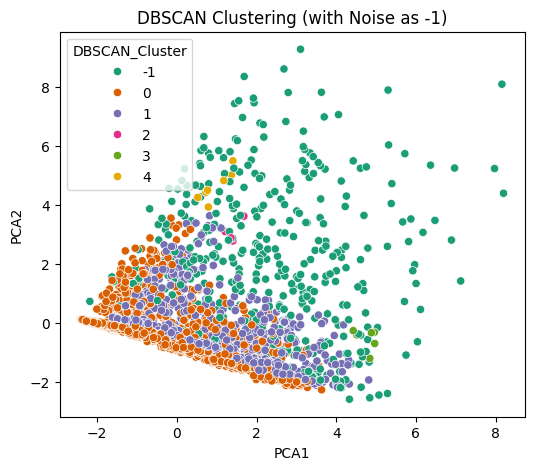

In [30]:
plt.figure(figsize=(6, 5))
sns.scatterplot(data=scaled_df, x='PCA1', y='PCA2', hue='DBSCAN_Cluster', palette='Dark2')
plt.title("DBSCAN Clustering (with Noise as -1)")
plt.show()


This code generates a scatter plot using Seaborn. It visualizes the data reduced to two dimensions by PCA (PCA1 and PCA2), with each point colored according to its assigned cluster by DBSCAN. The title indicates that noise points (-1) are included in the visualization.

**Evaluation and Performance Metrics:**

1: Prepare Feature Data

In [31]:
X = scaled_df.drop(['KMeans_Cluster', 'Hierarchical_Cluster', 'DBSCAN_Cluster', 'PCA1', 'PCA2'], axis=1)


This code creates a new DataFrame called X by dropping the columns containing the cluster labels ('KMeans_Cluster', 'Hierarchical_Cluster', 'DBSCAN_Cluster') and the PCA components ('PCA1', 'PCA2') from the scaled_df DataFrame. The axis=1 argument specifies that columns are being dropped. This X DataFrame is likely being prepared as the feature set for further analysis or evaluation, without including the clustering results or the dimensionality-reduced data.

2: K-Means Silhouette Score

In [32]:
from sklearn.metrics import silhouette_score

kmeans_labels = scaled_df['KMeans_Cluster']
kmeans_silhouette = silhouette_score(X, kmeans_labels)
print("K-Means Silhouette Score:", round(kmeans_silhouette, 4))


K-Means Silhouette Score: 0.2446


This code calculates and prints the silhouette score for the K-Means clustering results:

1. Imports the silhouette_score function.
2. Retrieves the K-Means cluster labels from the scaled_df DataFrame.
3. Calculates the silhouette score. It takes the feature data X (which you created earlier by dropping cluster labels and PCA components) and the K-Means labels as input. The silhouette score measures how similar an object is to its own cluster compared to other clusters. A higher score indicates better-defined clusters.
4. Prints the calculated silhouette score, rounded to 4 decimal places.

3: Hierarchical Clustering Silhouette Score

In [33]:
hier_labels = scaled_df['Hierarchical_Cluster']
hier_silhouette = silhouette_score(X, hier_labels)
print("Hierarchical Clustering Silhouette Score:", round(hier_silhouette, 4))


Hierarchical Clustering Silhouette Score: 0.246


his code calculates the silhouette score for the Hierarchical Clustering results:
1. This line retrieves the cluster labels generated by the Hierarchical Clustering algorithm from the scaled_df DataFrame.
2. This calculates the silhouette score using the original feature data X and the hierarchical cluster labels. The silhouette score is a metric used to evaluate the quality of clusters.
3.  This line prints the calculated silhouette score for the Hierarchical Clustering, rounded to four decimal places.

4: DBSCAN Silhouette Score (excluding noise)

In [34]:
dbscan_labels = scaled_df['DBSCAN_Cluster']

# Exclude noise (-1) for silhouette calculation
mask = dbscan_labels != -1
if len(set(dbscan_labels[mask])) > 1 and sum(mask) > 0:
    dbscan_silhouette = silhouette_score(X[mask], dbscan_labels[mask])
    print("DBSCAN Silhouette Score (excluding noise):", round(dbscan_silhouette, 4))
else:
    print("DBSCAN Silhouette Score: Not valid (only 1 cluster or too many noise points).")


DBSCAN Silhouette Score (excluding noise): 0.2465


This code calculates the silhouette score for the DBSCAN clustering results, specifically excluding noise points:
1. Retrieves the cluster labels assigned by the DBSCAN algorithm from the scaled_df DataFrame.
2. Creates a boolean mask that is True for data points that are not noise (i.e., their cluster label is not -1) and False for noise points.
3. This condition checks if there are actual clusters formed (more than one unique label among non-noise points) and if there are any non-noise points to calculate the score on.
4. If the condition is met, the silhouette score is calculated. It uses the original feature data X, but only for the rows identified by the mask (i.e., the non-noise points). The corresponding cluster labels for these points are also used.
5. Prints the calculated silhouette score for DBSCAN, rounded to four decimal places.
6. If the condition in step 3 is not met (meaning DBSCAN didn't form meaningful clusters or most points were noise), it prints a message indicating that a valid silhouette score could not be calculated.

**Conclusion**:

In this clustering analysis, we applied K-Means, Hierarchical Clustering, and DBSCAN to the EastWestAirlines dataset after thorough data preprocessing and EDA. Each algorithm identified meaningful customer segments based on features like balance, miles flown, and enrollment history.

* K-Means produced the most well-defined clusters with the highest silhouette score.

* Hierarchical Clustering revealed similar groupings and provided a good structural overview.

* DBSCAN effectively detected dense clusters and flagged outliers as noise.

Visualizations using PCA confirmed the separation of clusters. Overall, clustering provided valuable insights for potential customer segmentation, targeted marketing, and loyalty program strategies.